In [74]:
import os
import sklearn as skl
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
data_folder = "/Users/simondi/PHD/data/data/target_infect_x/2-analysis-subsamples/"

In [15]:
files = sorted(os.listdir(data_folder,))

In [25]:
table = pd.read_csv(data_folder + "/" + files[1], sep="\t")

In [54]:
features = table.iloc[:,10:].as_matrix()

/Users/simondi/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [115]:
cluster_sequence = list(range(2, 10, 2)) + [20, 30, 40, 50, 75, 100, 200, 300, 500]

In [116]:
def bic(rss, N, K, P):
   bic_ =  N + N * np.log(2 * np.pi) + N * np.log(rss/N) + np.log(N) * (K + P + 1)
   return bic_

In [117]:
n_obs = 10 ** np.ceil(np.log10(features.shape[0]))

In [118]:
df = pd.DataFrame({'K' : [], 'SSE': [], 'BIC': []})
for k in map(lambda x: x* (n_obs / 1000), cluster_sequence):
    k = int(k)
    km = KMeans(n_clusters = k)
    mod = km.fit(features)
    sse = mod.inertia_
    bic_ = bic(sse, features.shape[0], k, features.shape[1])
    df2 = pd.DataFrame({'K' : [k], 'SSE': [sse], 'BIC': [bic_]})
    df = df.append(df2)

In [132]:
min_idx = np.argmin(df["BIC"].as_matrix())

/Users/simondi/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [137]:
df["BIC"].iloc[min_idx]

5603.49136974872

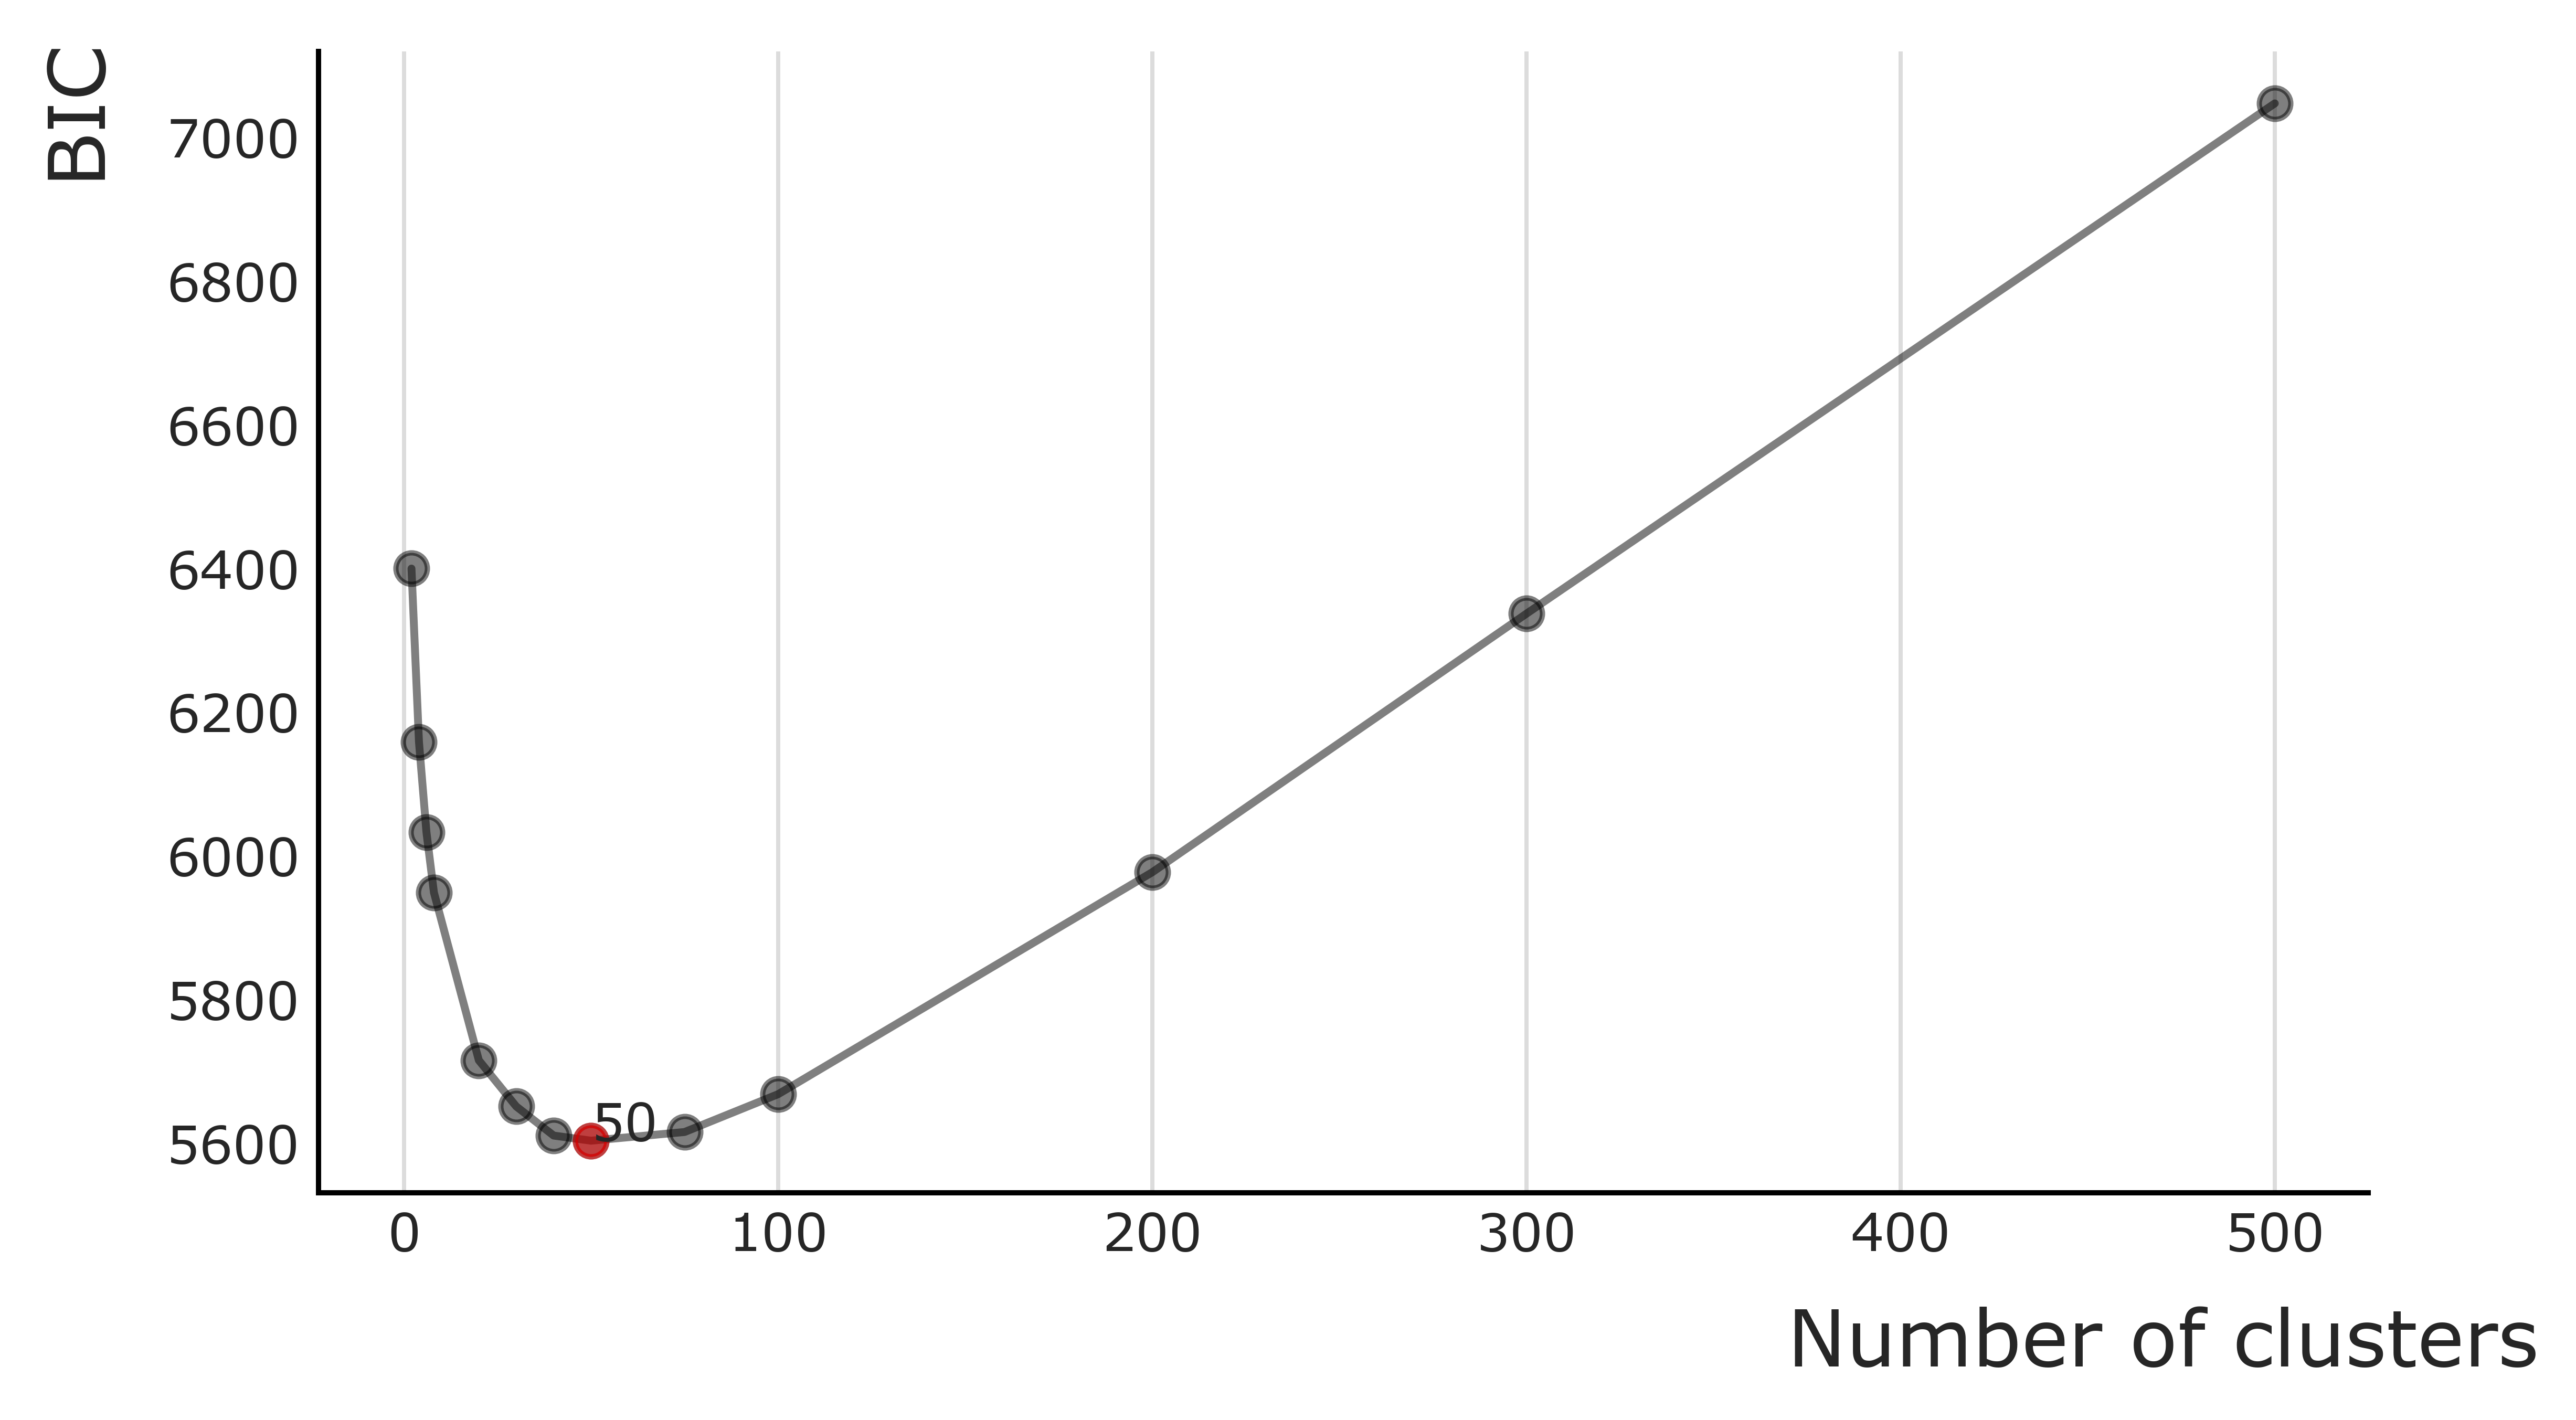

In [150]:
plt.style.use(["seaborn-whitegrid"])
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']

_, ax = plt.subplots(figsize=(7, 4), dpi=720)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_label_coords(x=.9, y=-0.1)
ax.yaxis.set_label_coords(x=-0.10, y=.95)
ax.grid(linestyle="")
ax.grid(which="major", axis="x", linestyle="-", color="gainsboro")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

ax.plot(df["K"], df["BIC"], "black", alpha=.5, marker="o")
ax.plot(df["K"].iloc[min_idx], df["BIC"].iloc[min_idx], "red", alpha=.5, marker="o")
plt.text(df["K"].iloc[min_idx], df["BIC"].iloc[min_idx], int(df["K"].iloc[min_idx]))

plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel("BIC", fontsize=15)
plt.title('')
plt.show()